<a href="https://colab.research.google.com/github/Paulina9555/ML_classificationproject/blob/main/projekt_klasyfikacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('df2.csv')

In [ ]:
df

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [ ]:
y_sample = df.sample(100)['Attrition']
y_sample = np.where((y_sample == 'Yes') | (y_sample == 'No'), 1, 0)

In [ ]:
y_sample

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

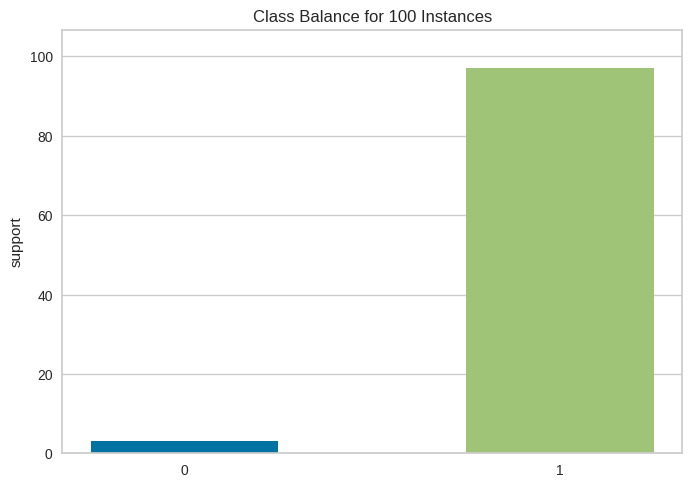

<Axes: title={'center': 'Class Balance for 100 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()

visualizer.fit(y_sample)
visualizer.show()

In [ ]:
y_pred = np.random.randint(0,2,len(y_sample))

In [ ]:
def confusion_matrix(truth, predictions):
  tp, tn, fp, fn = 0, 0, 0, 0
  for label, predicted in zip(truth, predictions):
    if label == predicted:
      if predicted: #predicted == 1
        tp += 1 # tp = tp + 1
      else:
        tn += 1
    else:
      if predicted:
        fp += 1
      else:
        fn += 1
  return tp, tn, fp, fn

In [ ]:
confusion_matrix(y_sample, y_pred)

(48, 1, 2, 49)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [ ]:
def calculate_metrics(y_truth, y_pred):
  print('Accuracy:\t:', round(accuracy_score(y_truth, y_pred),2))
  print('Recall:\t:', round(recall_score(y_truth, y_pred),2))
  print('Precision:\t:', round(precision_score(y_truth, y_pred),2))
  print('F1:\t:', round(f1_score(y_truth, y_pred),2))


In [ ]:
calculate_metrics(y_sample, y_pred)

Accuracy:	: 0.49
Recall:	: 0.49
Precision:	: 0.96
F1:	: 0.65


In [ ]:
cfm =confusion_matrix(y_sample, y_pred)

In [ ]:
import seaborn as sns

<Axes: >

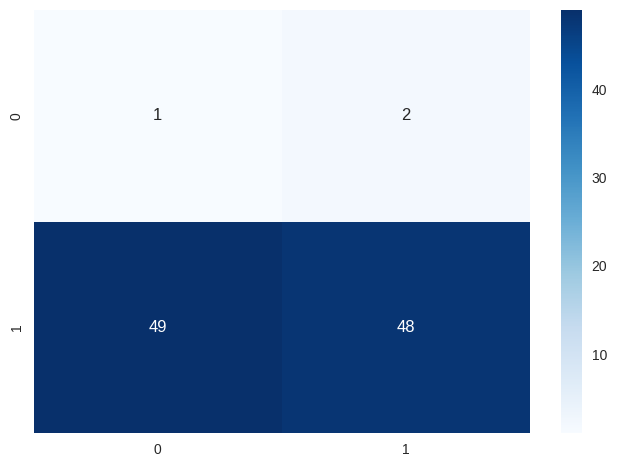

In [ ]:
sns.heatmap(cfm, annot=True, cmap='Blues')

In [ ]:
X = df[['YearsAtCompany', 'WorkLifeBalance']]
y = df['Attrition']

In [ ]:
y=np.where((y == 'Yes') | (y == 'No'),1,0)

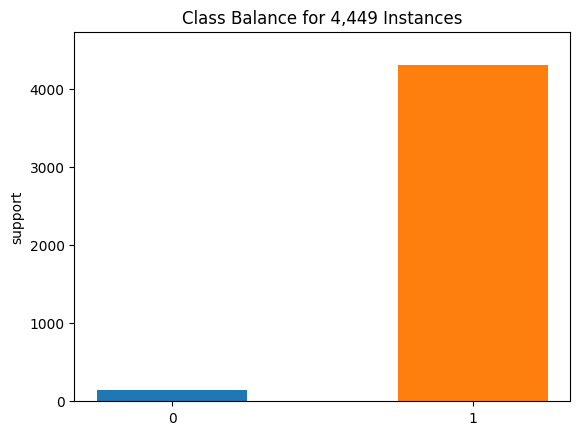

<Axes: title={'center': 'Class Balance for 4,449 Instances'}, ylabel='support'>

In [ ]:
from yellowbrick.target import ClassBalance

visualizer = ClassBalance()

visualizer.fit(y)
visualizer.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size = 0.2,
                                                     random_state=42,
                                                     stratify = y)

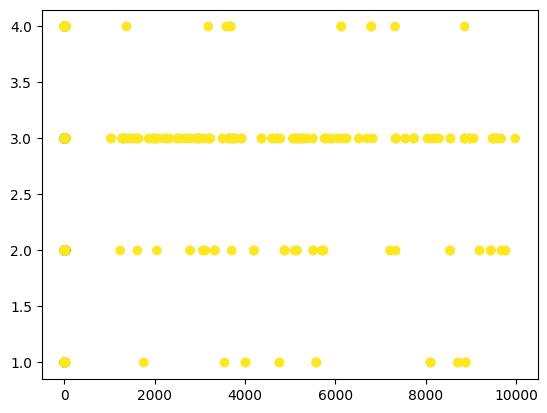

In [ ]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('default')

plt.scatter(X_train['YearsAtCompany'],
            X_train['WorkLifeBalance'],
            c=y_train)

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_train)

In [ ]:
y_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
lr.predict_proba(X_train)

array([[0.03202134, 0.96797866],
       [0.03156169, 0.96843831],
       [0.03452797, 0.96547203],
       ...,
       [0.03490328, 0.96509672],
       [0.03248745, 0.96751255],
       [0.03502925, 0.96497075]])

In [ ]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	: 0.97
Recall:	: 1.0
Precision:	: 0.97
F1:	: 0.98


In [ ]:
y_test_pred = lr.predict(X_test)

In [ ]:
calculate_metrics(y_test, y_test_pred)

Accuracy:	: 0.97
Recall:	: 1.0
Precision:	: 0.97
F1:	: 0.98


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.97      1.00      0.98      3441

    accuracy                           0.97      3559
   macro avg       0.48      0.50      0.49      3559
weighted avg       0.93      0.97      0.95      3559



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from scipy.ndimage import label
def plot_decission_area(estimator, X, y, threshold=0.5, binary=True):

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000),
                         np.linspace(x2_min, x2_max, 1000))

    predicted = estimator.predict_proba(np.column_stack((x1.flatten(),
                                            x2.flatten())))[:,1].reshape(x1.shape)
    if binary:
      predicted = np.where(predicted >= threshold, 1, 0)

    fig, ax = plt.subplots()
    pc = ax.pcolormesh(x1, x2, predicted)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

    if not binary:
      plt.colorbar(pc)

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


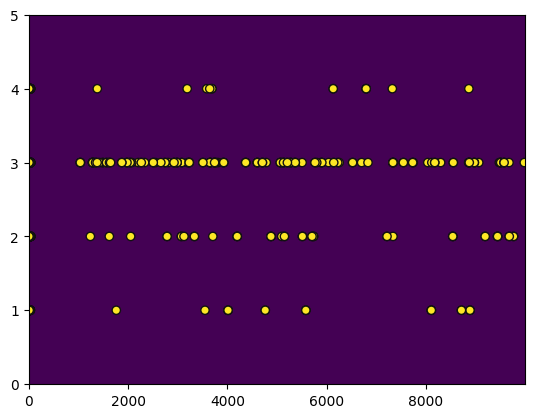

In [ ]:
plot_decission_area(lr, X_train.values, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train)


LogisticRegression()

In [ ]:
y_train_pred = lr.predict(X_train_std)

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       118
           1       0.97      1.00      0.98      3441

    accuracy                           0.97      3559
   macro avg       0.48      0.50      0.49      3559
weighted avg       0.93      0.97      0.95      3559



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


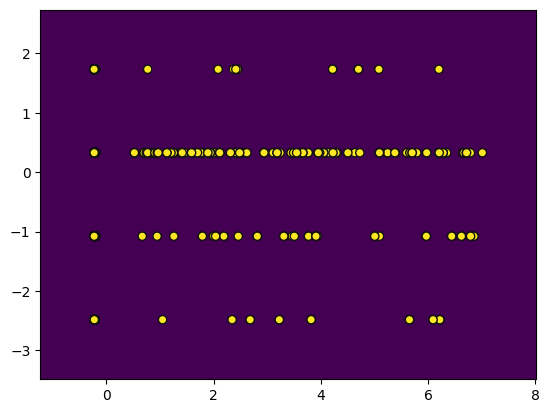

In [ ]:
plot_decission_area(lr, X_train_std, y_train)

In [ ]:
X_test_std = sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


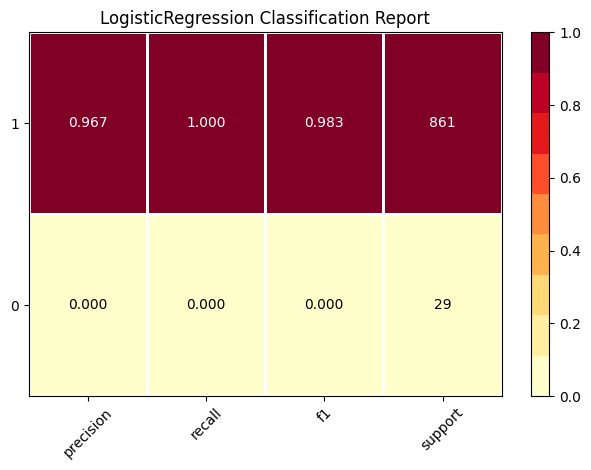

In [ ]:
from yellowbrick.classifier import classification_report

visualizer = classification_report(
    lr, X_train_std, y_train, X_test_std, y_test, support=True

)

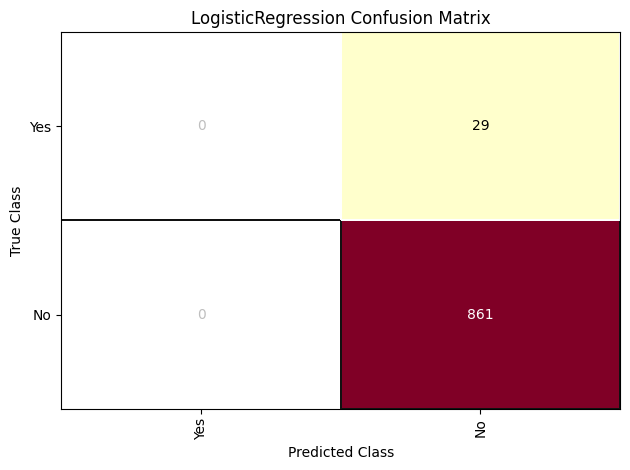

<Figure size 640x480 with 0 Axes>

In [ ]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix(
    lr,
    X_train_std, y_train, X_test_std, y_test,
    classes=['Yes','No']
)

plt.tight_layout()

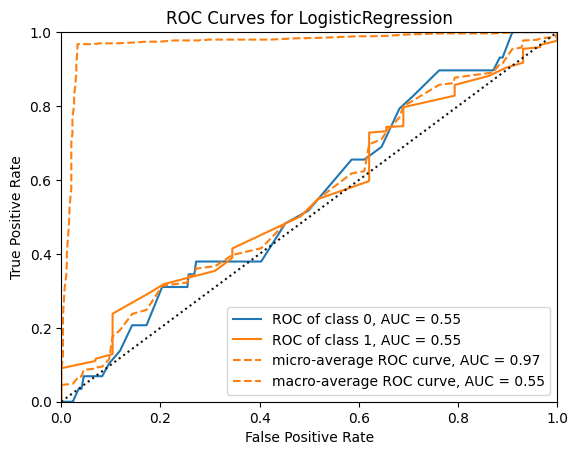

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=LogisticRegression())

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc

roc_auc(lr, X_train_std, y_train, X_test_std, y_test)

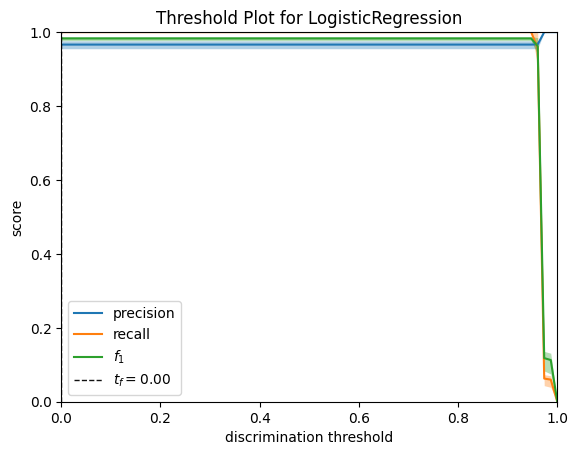

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(lr, exclude='queue_rate')

visualizer.fit(X_train_std, y_train)
visualizer.show()

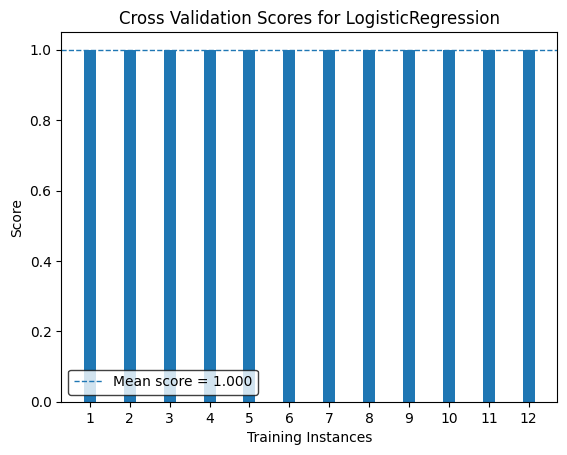

In [ ]:
from sklearn.model_selection import KFold
from yellowbrick.model_selection import cv_scores

cv = KFold(n_splits=12, shuffle=True, random_state=42)

visualizer = cv_scores(lr, X_train_std, y_train, cv=cv, scoring='recall')

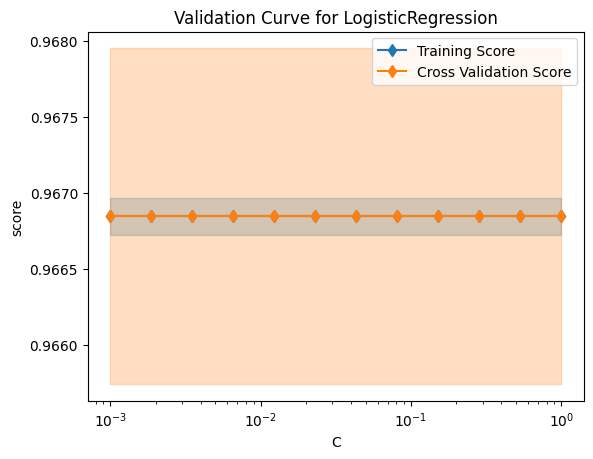

In [ ]:
import numpy as np
from yellowbrick.model_selection import validation_curve

viz = validation_curve(
    lr,
    X_train_std,
    y_train,
    param_name="C",
    param_range=np.logspace(-3, 0, 12),
    cv=10,
    logx = True
)

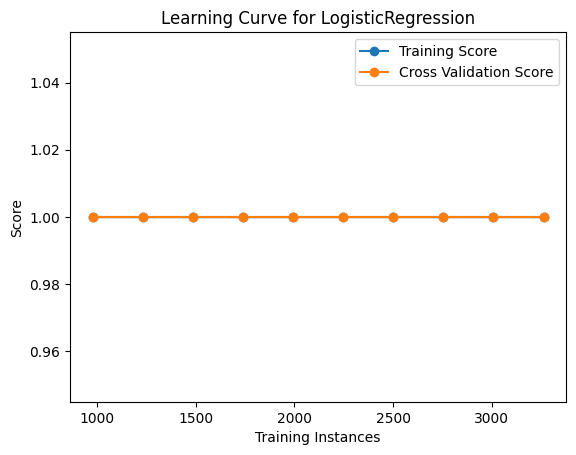

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve

sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(
    lr,
    cv=12, scoring='recall',
    train_sizes = sizes, n_jobs=4
)

visualizer.fit(X_train_std, y_train)
visualizer.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)

In [ ]:
print(classification_report(y_train, y_train_pred))

TypeError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


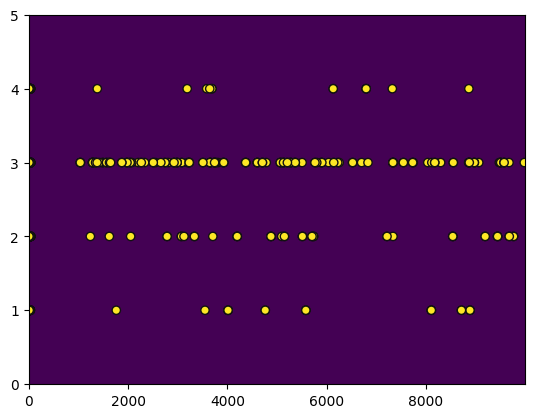

In [ ]:
plot_decission_area(dtc, X_train.values, y_train)